# Least Square Method - Polynomial

<a href="https://en.wikipedia.org/wiki/Linear_least_squares_(mathematics)">Wikipedia</a>
[Polynomial 수식 유도](http://mathworld.wolfram.com/LeastSquaresFittingPolynomial.html)

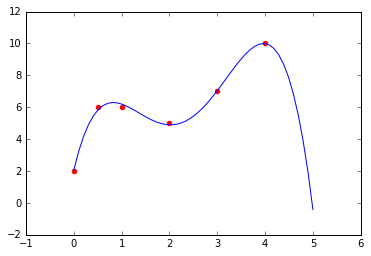

In [284]:
# https://en.wikipedia.org/wiki/Linear_least_squares_(mathematics)
# http://mathworld.wolfram.com/LeastSquaresFittingPolynomial.html
#Motivational_example

%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

def buildX(input, k):
    X = [np.ones(input.shape[0])]
    
    for i in range(k):
        X.append(np.power(x, i + 1))
    
    return np.matrix(X)

def evaluate(a, x):
    yy = 0
    
    for i in range(a.shape[0]):
        yy += a[i] * np.power(x, i)
        
    return yy



k = 4

input = np.array([
    [0, 2],
    [0.5, 6],
    [1, 6],
    [2, 5],
    [3, 7],
    [4, 10],
    #[5, 100],
])

x = input[:,0]
y = np.matrix(input[:,1]).T

#X = np.matrix([np.ones(N), x]).T
#X = np.matrix([np.ones(N), np.power(x, 1), np.power(x, 2), np.power(x, 3)]).T
X = buildX(x, k).T

a = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)

plt.figure(1)
xx = np.linspace(0, 5)
#yy = np.array(a[0] + a[1] * xx)
#yy = np.array(a[0] + a[1] * xx + a[2] * np.power(xx,2) + a[3] * np.power(xx,3))
yy = evaluate(a, xx)
plt.plot(xx, yy.T, color='b')

plt.scatter(x, input[:,1], color='r')
plt.show()



In [285]:
a

matrix([[  2.05056154],
        [ 12.729422  ],
        [-12.46402442],
        [  4.36687792],
        [ -0.48059089]])

In [286]:
def plot(i, a, input):
    plt.figure(i)
    xx = np.linspace(0, 5)
    yy = evaluate(a, xx)
    plt.plot(xx, yy.T, color='b')
    plt.scatter(x, input[:,1], color='r')
    plt.show()

epoch = 0, E = 125.000000


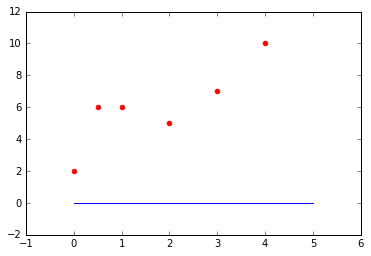

epoch = 10000, E = 17.355592


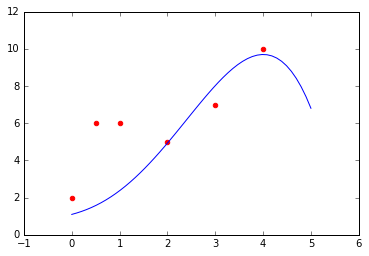

epoch = 20000, E = 10.308432


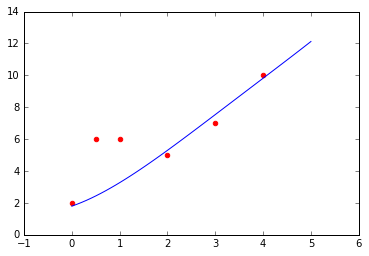

epoch = 30000, E = 6.784449


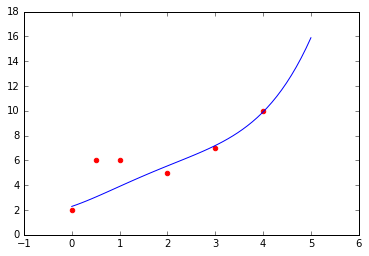

epoch = 40000, E = 5.018492


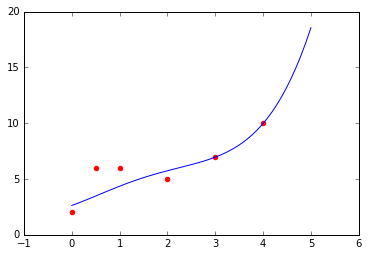

epoch = 50000, E = 4.129838


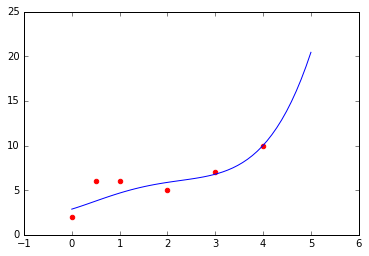

epoch = 60000, E = 3.679039


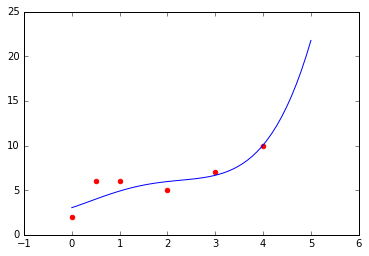

epoch = 70000, E = 3.446827


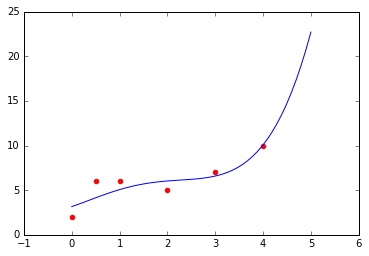

epoch = 80000, E = 3.323789


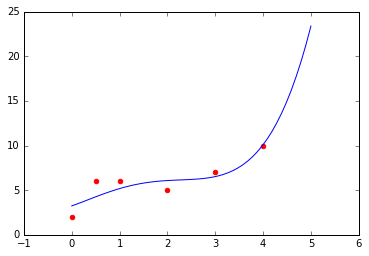

epoch = 90000, E = 3.255326


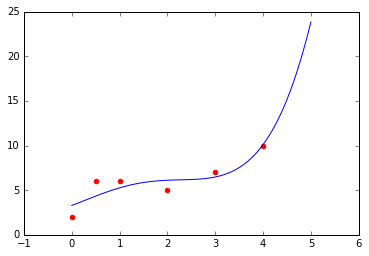

epoch = 100000, E = 3.214193


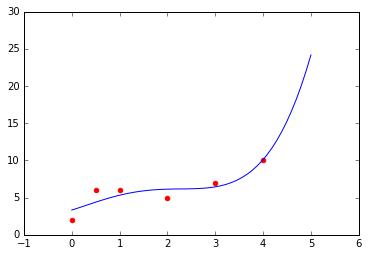

In [288]:
a = np.zeros([k+1, 1])

mu = 0.00001

epoch = 100000

E = 0
for i in range(epoch):
    f = a.T * X.T
    e = y.T - f
    E = 0.5 * np.sum(np.power(e, 2))

    if (i % (epoch / 10) == 0):
        print "epoch = %d, E = %f" % (i, E)
        plot(i / (epoch / 10), a, input)
    
    gradE = - (e*X).T

    a -= mu * gradE
    
    

    
print "epoch = %d, E = %f" % (epoch, E)
plot(epoch / (epoch / 10), a, input)

In [246]:
a

array([[ 3.0350388 ],
       [ 4.79487747],
       [-2.60159173],
       [ 0.46141208]])

# Logistic Regression

[참고](http://aimotion.blogspot.kr/2011/11/machine-learning-with-python-logistic.html)

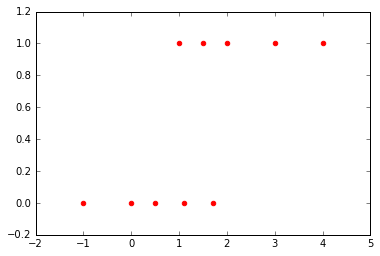

In [271]:
input = np.array([
    [-1, 0],
    [0, 0],
    [0.5, 0],
    [1, 1],
    [1.1, 0],
    [1.5, 1],
    [1.7, 0],
    [2, 1],
    [3, 1],
    [4, 1],
    #[5, 100],
])

plt.figure(1)

plt.scatter(input[:,0], input[:,1], color='r')

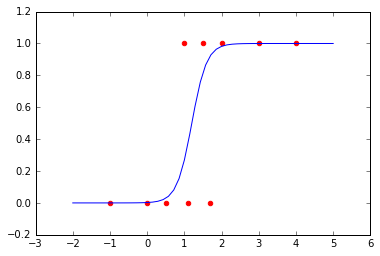

In [272]:
plt.figure(1)
xx = np.linspace(-2, 5)
yy = 1 / (1 + np.exp(- (5 * (xx - 1.2))))
plt.plot(xx, yy.T, color='b')

plt.scatter(input[:,0], input[:,1], color='r')

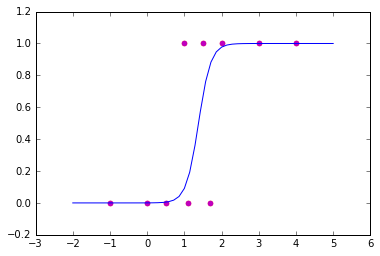

In [273]:
y = (input[:,1] - 0.5) * 0.99999 + 0.5

liny = - np.log(1 / y - 1)

x = input[:,0]

X = np.matrix([np.ones(input.shape[0]), x]).T
linY = np.matrix(liny).T
a = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(linY)

xx = np.linspace(-2, 5)
linyy = np.array(a[0] + a[1] * xx)
yy = 1 / (1 + np.exp(-linyy))

plt.figure(1)
plt.plot(xx, yy.T, color='b')
plt.scatter(input[:,0], input[:,1], color='r')
plt.scatter(input[:,0], y, color='m')


In [114]:
a

matrix([[-9.27872957],
        [ 3.02586286]])

         Current function value: nan
         Iterations: 1
         Function evaluations: 42
         Gradient evaluations: 42
For a student with scores 45 and 85, we predict and admission probability of 0.776288
Train Accuracy: 89.000000


/home/je/anaconda2/envs/theano/lib/python2.7/site-packages/ipykernel/__main__.py:10: RuntimeWarning: overflow encountered in power
/home/je/anaconda2/envs/theano/lib/python2.7/site-packages/ipykernel/__main__.py:29: RuntimeWarning: divide by zero encountered in log


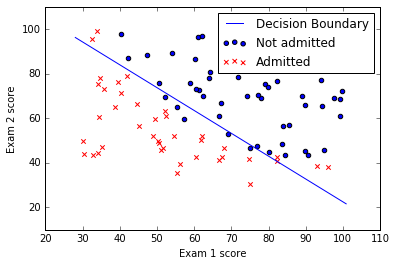

In [150]:
from numpy import loadtxt, where, zeros, e, array, log, ones, mean, where
from pylab import scatter, show, legend, xlabel, ylabel, plot
from scipy.optimize import fmin_bfgs


def sigmoid(X):
    '''Compute the sigmoid function '''
    #d = zeros(shape=(X.shape))

    den = 1.0 + e ** (-1.0 * X)

    d = 1.0 / den

    return d


def compute_cost(theta, X, y):
    '''
    Comput cost for logistic regression
    '''
    #Number of training samples

    theta.shape = (1, 3)

    m = y.size

    h = sigmoid(X.dot(theta.T))

    J = (1.0 / m) * ((-y.T.dot(log(h))) - ((1.0 - y.T).dot(log(1.0 - h))))

    return - 1 * J.sum()


def compute_grad(theta, X, y):

    #print theta.shape

    theta.shape = (1, 3)

    grad = zeros(3)

    h = sigmoid(X.dot(theta.T))

    delta = h - y

    l = grad.size

    for i in range(l):
        sumdelta = delta.T.dot(X[:, i])
        grad[i] = (1.0 / m) * sumdelta * - 1

    theta.shape = (3,)

    return  grad

import os
#load the dataset
data = loadtxt(os.path.expanduser('~/Downloads/ex2data1.txt'), delimiter=',')

X = data[:, 0:2]
y = data[:, 2]

pos = where(y == 1)
neg = where(y == 0)
scatter(X[pos, 0], X[pos, 1], marker='o', c='b')
scatter(X[neg, 0], X[neg, 1], marker='x', c='r')
xlabel('Exam 1 score')
ylabel('Exam 2 score')
legend(['Not Admitted', 'Admitted'])
#show()

m, n = X.shape

y.shape = (m, 1)

#Add intercept term to x and X_test
it = ones(shape=(m, 3))
it[:, 1:3] = X


def decorated_cost(it, y):
    def f(theta):
        return compute_cost(theta, it, y)

    def fprime(theta):
        return compute_grad(theta, it, y)

    #Initialize theta parameters
    theta = zeros(3)

    return fmin_bfgs(f, theta, fprime, disp=True, maxiter=400)

decorated_cost(it, y)
theta = [-25.161272, 0.206233, 0.201470]


#Plotting the decision boundary
plot_x = array([min(it[:, 1]) - 2, max(it[:, 2]) + 2])
plot_y = (- 1.0 / theta[2]) * (theta[1] * plot_x + theta[0])
plot(plot_x, plot_y)
legend(['Decision Boundary', 'Not admitted', 'Admitted'])
#show()

prob = sigmoid(array([1.0, 45.0, 85.0]).dot(array(theta).T))
print 'For a student with scores 45 and 85, we predict and admission ' + \
    'probability of %f' % prob


def predict(theta, X):
    '''Predict whether the label
    is 0 or 1 using learned logistic
    regression parameters '''
    m, n = X.shape
    p = zeros(shape=(m, 1))

    h = sigmoid(X.dot(theta.T))

    for it in range(0, h.shape[0]):
        if h[it] > 0.5:
            p[it, 0] = 1
        else:
            p[it, 0] = 0

    return p

#Compute accuracy on our training set
p = predict(array(theta), it)
print 'Train Accuracy: %f' % ((y[where(p == y)].size / float(y.size)) * 100.0)


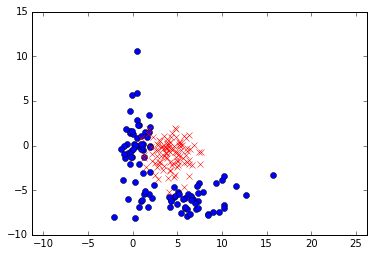

In [146]:
mean = [0, 0]
cov = [[1, 0], [0, 10]]
N = 100
Yes = np.zeros([2, N])
Yes1 = np.random.multivariate_normal([0, 0], [[1, 0], [0, 10]], N / 2).T
Yes2 = np.random.multivariate_normal([6, -6], [[10, 0], [0, 1]], N / 2).T
Yes[:2, :N/2] = Yes1
Yes[:2, N/2:] = Yes2

No = np.random.multivariate_normal([4, -1], [[2, 0], [0, 2]], N).T

plt.plot(Yes[0,:], Yes[1,:], 'o', color='b')
plt.plot(No[0,:], No[1,:], 'x', color='r')
plt.axis('equal')
plt.show()

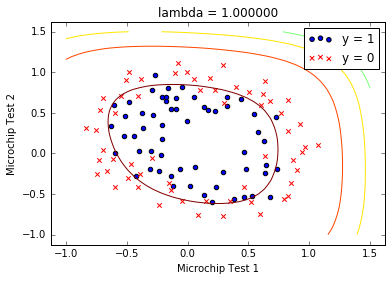

Train Accuracy: 83.050847


In [152]:
from numpy import loadtxt, where, zeros, e, array, log, ones, append, linspace
from pylab import scatter, show, legend, xlabel, ylabel, contour, title
from scipy.optimize import fmin_bfgs


def sigmoid(X):
    '''Compute the sigmoid function '''
    #d = zeros(shape=(X.shape))

    den = 1.0 + e ** (-1.0 * X)

    d = 1.0 / den

    return d


def cost_function_reg(theta, X, y, l):
    '''Compute the cost and partial derivatives as grads
    '''

    h = sigmoid(X.dot(theta))

    thetaR = theta[1:, 0]

    J = (1.0 / m) * ((-y.T.dot(log(h))) - ((1 - y.T).dot(log(1.0 - h)))) \
            + (l / (2.0 * m)) * (thetaR.T.dot(thetaR))

    delta = h - y
    sumdelta = delta.T.dot(X[:, 1])
    grad1 = (1.0 / m) * sumdelta

    XR = X[:, 1:X.shape[1]]
    sumdelta = delta.T.dot(XR)

    grad = (1.0 / m) * (sumdelta + l * thetaR)

    out = zeros(shape=(grad.shape[0], grad.shape[1] + 1))

    out[:, 0] = grad1
    out[:, 1:] = grad

    return J.flatten(), out.T.flatten()


def map_feature(x1, x2):
    '''
    Maps the two input features to quadratic features.

    Returns a new feature array with more features, comprising of
    X1, X2, X1 ** 2, X2 ** 2, X1*X2, X1*X2 ** 2, etc...

    Inputs X1, X2 must be the same size
    '''
    x1.shape = (x1.size, 1)
    x2.shape = (x2.size, 1)
    degree = 6
    out = ones(shape=(x1[:, 0].size, 1))

    m, n = out.shape

    for i in range(1, degree + 1):
        for j in range(i + 1):
            r = (x1 ** (i - j)) * (x2 ** j)
            out = append(out, r, axis=1)

    return out

#load the dataset
data = loadtxt(os.path.expanduser('~/Downloads/ex2data2.txt'), delimiter=',')

X = data[:, 0:2]
y = data[:, 2]

pos = where(y == 1)
neg = where(y == 0)
scatter(X[pos, 0], X[pos, 1], marker='o', c='b')
scatter(X[neg, 0], X[neg, 1], marker='x', c='r')
xlabel('Microchip Test 1')
ylabel('Microchip Test 2')
legend(['y = 1', 'y = 0'])
#show()

m, n = X.shape

y.shape = (m, 1)

it = map_feature(X[:, 0], X[:, 1])

#Initialize theta parameters
initial_theta = zeros(shape=(it.shape[1], 1))

#Set regularization parameter lambda to 1
l = 1

# Compute and display initial cost and gradient for regularized logistic
# regression
cost, grad = cost_function_reg(initial_theta, it, y, l)

def decorated_cost(theta):
    return cost_function_reg(theta, it, y, l)

#print fmin_bfgs(decorated_cost, initial_theta, maxfun=400)




theta = [
 1.273005, 
 0.624876,
 1.177376,
 -2.020142, 
 -0.912616,
 -1.429907, 
 0.125668, 
 -0.368551, 
 -0.360033,
 -0.171068, 
 -1.460894, 
 -0.052499, 
 -0.618889, 
 -0.273745, 
 -1.192301, 
 -0.240993, 
 -0.207934, 
 -0.047224, 
 -0.278327, 
 -0.296602, 
 -0.453957, 
 -1.045511, 
 0.026463, 
 -0.294330, 
 0.014381,
 -0.328703, 
 -0.143796,
 -0.924883,
]

#Plot Boundary
u = linspace(-1, 1.5, 50)
v = linspace(-1, 1.5, 50)
z = zeros(shape=(len(u), len(v)))
for i in range(len(u)):
    for j in range(len(v)):
        z[i, j] = (map_feature(array(u[i]), array(v[j])).dot(array(theta)))

z = z.T
contour(u, v, z)
title('lambda = %f' % l)
xlabel('Microchip Test 1')
ylabel('Microchip Test 2')
legend(['y = 1', 'y = 0', 'Decision boundary'])
show()


def predict(theta, X):
    '''Predict whether the label
    is 0 or 1 using learned logistic
    regression parameters '''
    m, n = X.shape
    p = zeros(shape=(m, 1))

    h = sigmoid(X.dot(theta.T))

    for it in range(0, h.shape[0]):
        if h[it] > 0.5:
            p[it, 0] = 1
        else:
            p[it, 0] = 0

    return p


#% Compute accuracy on our training set
p = predict(array(theta), it)
print 'Train Accuracy: %f' % ((y[where(p == y)].size / float(y.size)) * 100.0)
